In [1]:
# pip install pandas-profiling

In [2]:
import pandas as pd

In [3]:
data= pd.read_csv('F:/0.1 ExcelR Institute/Data Science/Assignments/Decision Trees/Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
# import pandas_profiling as pf
# pip install pandas-profiling
# profile_report= pf.ProfileReport(data)
# profile_report

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
from sklearn import preprocessing

In [7]:
data_encode= preprocessing.LabelEncoder()

In [8]:
data['Urban']=data_encode.fit_transform(data['Urban'])
data['US']=data_encode.fit_transform(data['US'])
data['ShelveLoc']=data_encode.fit_transform(data['ShelveLoc'])

In [9]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [10]:
import numpy as np
x= data.drop(data[['ShelveLoc']],axis=1)
y=data.iloc[:,6]

In [11]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [12]:
data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [16]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
import matplotlib.pyplot as plt

[Text(446.4, 380.52, 'X[0] <= 6.165\nentropy = 1.431\nsamples = 320\nvalue = [78, 64, 178]'),
 Text(223.2, 271.8, 'X[2] <= 57.5\nentropy = 1.11\nsamples = 114\nvalue = [57, 2, 55]'),
 Text(111.6, 163.07999999999998, 'X[5] <= 100.5\nentropy = 0.918\nsamples = 48\nvalue = [16, 0, 32]'),
 Text(55.8, 54.360000000000014, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(167.39999999999998, 54.360000000000014, 'entropy = 0.792\nsamples = 42\nvalue = [10, 0, 32]'),
 Text(334.79999999999995, 163.07999999999998, 'X[6] <= 78.5\nentropy = 1.11\nsamples = 66\nvalue = [41, 2, 23]'),
 Text(279.0, 54.360000000000014, 'entropy = 1.007\nsamples = 61\nvalue = [41, 1, 19]'),
 Text(390.59999999999997, 54.360000000000014, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(669.5999999999999, 271.8, 'X[0] <= 10.485\nentropy = 1.301\nsamples = 206\nvalue = [21, 62, 123]'),
 Text(558.0, 163.07999999999998, 'X[5] <= 97.5\nentropy = 1.192\nsamples = 159\nvalue = [20, 29, 110]'),
 Text(502.2, 54.3600

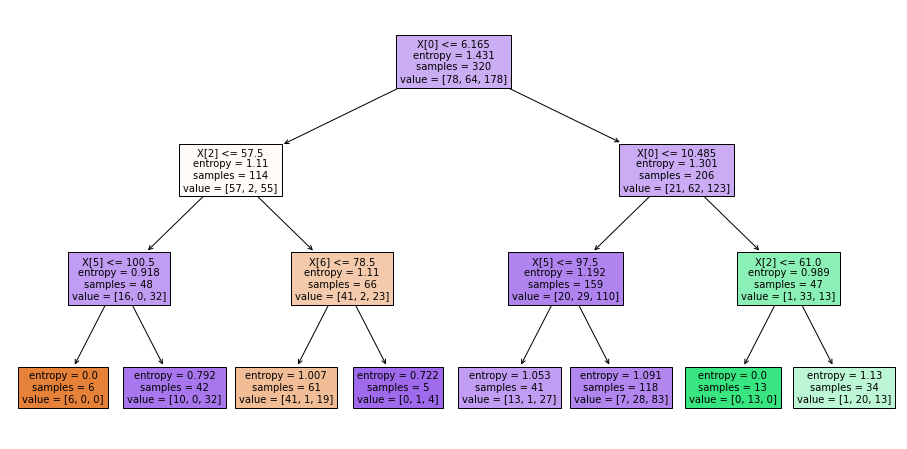

In [18]:
plt.figure(figsize=(16,8))
tree.plot_tree(model,fontsize=10,filled=True)

In [19]:
y_pred=model.predict(x_test)

In [20]:
pd.Series(y_pred).value_counts()

2    53
1    15
0    12
dtype: int64

In [21]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
ShelveLoc,,,
0,5,2,11
1,0,11,10
2,7,2,32


In [22]:
np.mean(y_pred==y_test)

0.6

# Using Gini Index

In [23]:
model_gini= DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
y_gini_pred= model_gini.predict(x_test)

In [25]:
np.mean(y_gini_pred==y_test)

0.6125

In [26]:
pd.crosstab(y_gini_pred,y_test)

ShelveLoc,0,1,2
row_0,,,
0,5,0,5
1,2,10,2
2,11,11,34
